# Explore Sound Waves for Cough Recordings.

This notebook was created to explore the sound waves of coughing frequencies. Based on this investigation the frequencies and regions of interest will be determined.

In [16]:
# All libraries needed
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join

from scipy import signal
from scipy.io import wavfile

import matplotlib.pyplot as plt
import seaborn as sns

import wave
import sys

## Load and plot wav files (part 1).

In this part, the file format was converted from .m4a to .wav, for ease of handling, and CSV files were adjusted using [re](https://docs.python.org/3/library/re.html). Then I ploted the full 22 files in order to take a quick look at all wave forms.

In [18]:
# Gettint the agjusted files' directory. 
directory_of_sounds = 'sounds/wav_samples/'
all_sounds = os.listdir(directory_of_sounds)

In [17]:
# Gettint the agjusted file names. 
file_names = [ f for f in listdir(directory_of_sounds) if os.path.isfile(join(directory_of_sounds,f)) ]
file_names

['sample-1613658951901.wav',
 'sample-1613659342809.wav',
 'sample-1613659433020.wav',
 'sample-1613659192458.wav',
 'sample-1613659072184.wav',
 'sample-1613659523228.wav',
 'sample-1613659402940.wav',
 'sample-1613659132314.wav',
 'sample-1613659102252.wav',
 'sample-1613659493147.wav',
 'sample-1613659282670.wav',
 'sample-1613659222524.wav',
 'sample-1613659252601.wav',
 'sample-1613658921823.wav',
 'sample-1613659042103.wav',
 'sample-1613658981959.wav',
 'sample-1613659553295.wav',
 'sample-1613659162389.wav',
 'sample-1613659012035.wav',
 'sample-1613659372875.wav',
 'sample-1613659312731.wav',
 'sample-1613659463081.wav']

In [12]:
def plot_wav(file = 'sounds/wav_samples/sample-1613658921823.wav'):
    spf = wave.open(file, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    
    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
        
    return signal

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


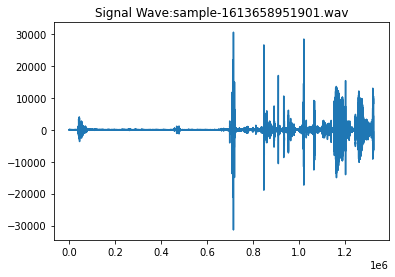

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


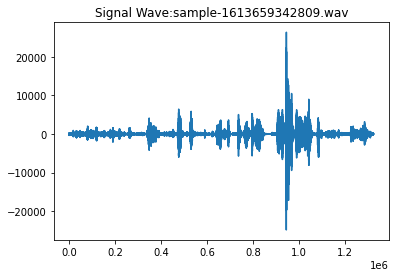

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


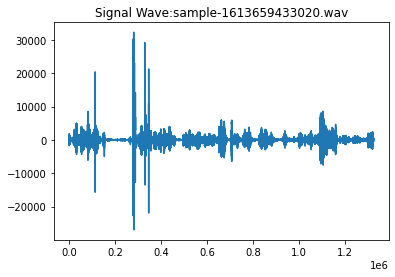

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


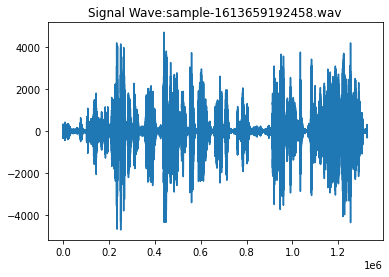

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


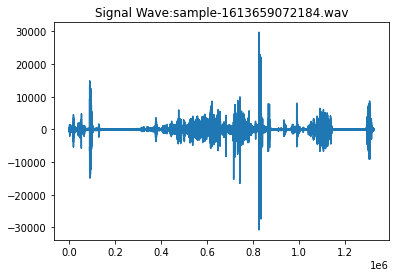

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


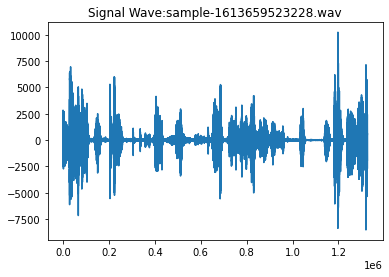

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


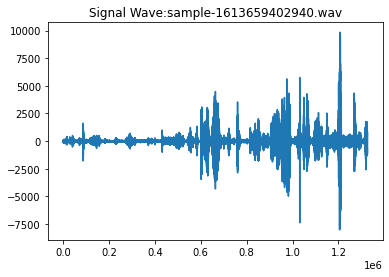

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


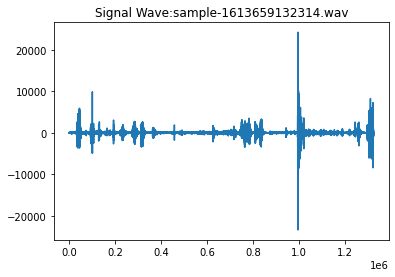

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


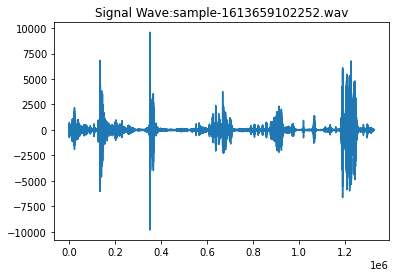

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


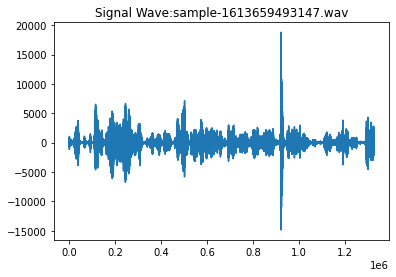

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


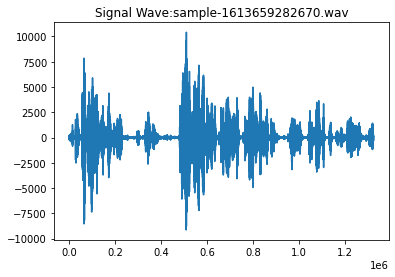

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


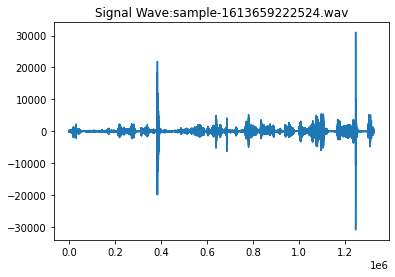

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


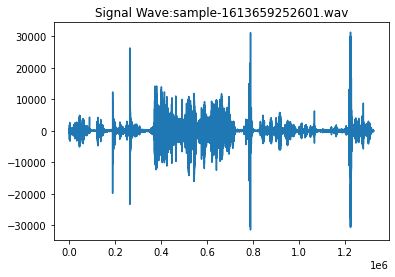

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


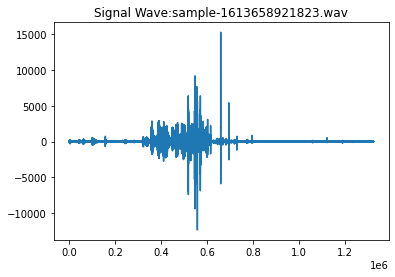

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


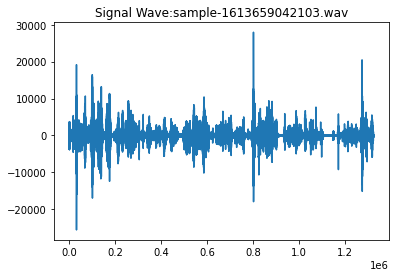

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


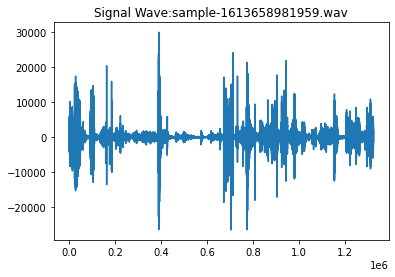

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


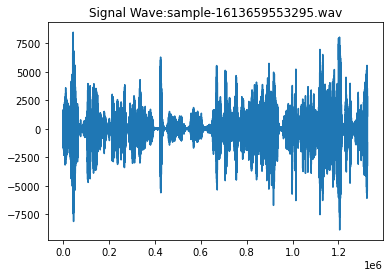

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


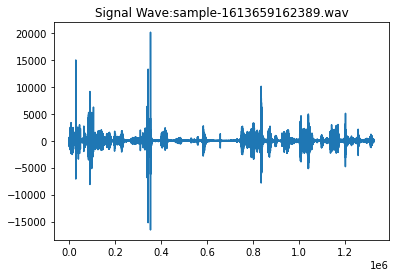

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


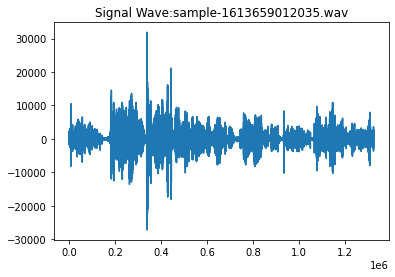

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


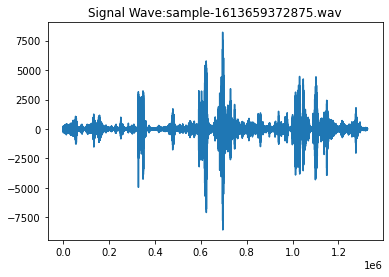

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


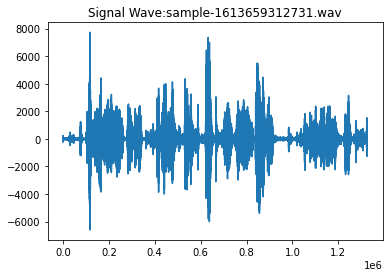

/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/mohamed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


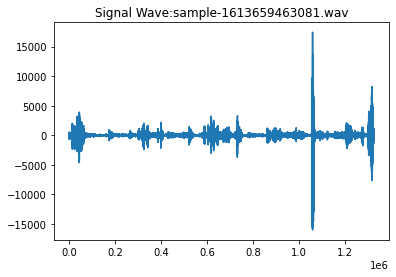

In [8]:
# Plot the 22 files in time domain
for i in range(len(file_names)):
    this_file = file_names[i]
    signal = plot_wav(directory_of_sounds + this_file)
    
    plt.figure(i)
    plt.title("Signal Wave:" + this_file)
    plt.plot(signal)
    plt.show()

## Plot signal within cough (part 2)

In [20]:
# getting file names within a cough
cough_aduio = pd.read_csv('perfect.csv')
cough_aduio

,file,peak_start
0,sounds/wav_samples/sample-1613658981959.wav,7.041
1,sounds/wav_samples/sample-1613659072184.wav,0.816
2,sounds/wav_samples/sample-1613659102252.wav,6.748
3,sounds/wav_samples/sample-1613659132314.wav,20.686
4,sounds/wav_samples/sample-1613659222524.wav,7.476
5,sounds/wav_samples/sample-1613659252601.wav,26.399
6,sounds/wav_samples/sample-1613659342809.wav,20.191
7,sounds/wav_samples/sample-1613659433020.wav,4.980
8,sounds/wav_samples/sample-1613659463081.wav,22.919
9,sounds/wav_samples/sample-1613659493147.wav,19.853


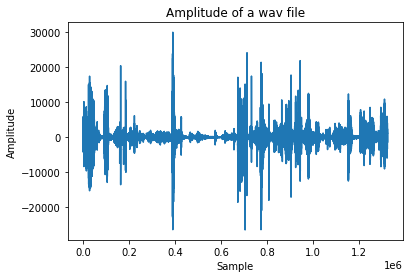

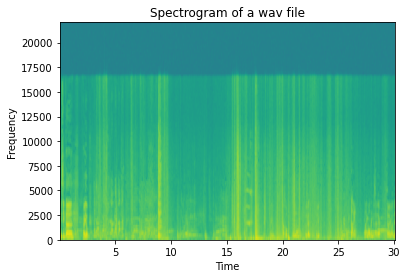

In [21]:
#import the pyplot and wavfile modules 
import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read('sounds/wav_samples/sample-1613658981959.wav')

# Plot the signal read from wav file
plot.title('Amplitude of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.show()

plot.title('Spectrogram of a wav file')
plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
 
plot.show()

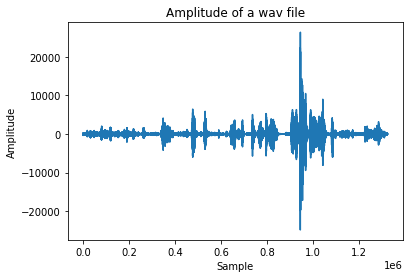

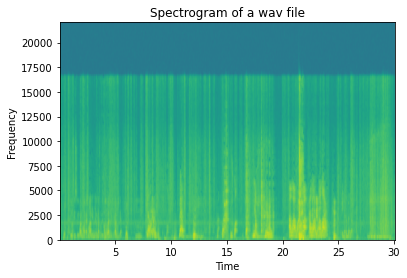

In [22]:
#import the pyplot and wavfile modules 
import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read('sounds/wav_samples/sample-1613659342809.wav')

# Plot the signal read from wav file
plot.title('Amplitude of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.show()

plot.title('Spectrogram of a wav file')
plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
 
plot.show()